## Preprocesamiento de Datos para el Modelo de Regresión

En esta sección, nos enfocaremos en preparar los datos para nuestro modelo de regresión. Realizaremos transformaciones necesarias, como el one-hot encoding para las variables categóricas y la normalización Z para las columnas numéricas.

### Paso 1: Lectura del Conjunto de Datos

Comenzaremos leyendo el conjunto de datos desde el archivo 'cars.csv' utilizando la biblioteca pandas. Esto nos permitirá cargar los datos en un DataFrame para su posterior procesamiento.

In [2]:
import pandas as pd
cars = pd.read_csv(r"C:\Users\Gary Alexander Bean\Desktop\Proyecto-Integrador-M6\database\ML_cars limpio.csv")
cars.head()

,car_id,marca,modelo,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,clasificacion_precio,calificacion_riesgo
0,1,alfa romeo,giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,0,Extremadamente Riesgoso
1,2,alfa romeo,stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,0,Extremadamente Riesgoso
2,3,alfa romeo,quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,0,Riesgoso
3,4,audi,a6,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,0,Muy Riesgoso
4,5,audi,a6,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,0,Muy Riesgoso


## Paso 2: Transformación de Variables Categóricas a Variables Dummy

A continuación, llevaremos a cabo la transformación de las variables categóricas en variables dummy utilizando la técnica de one-hot encoding. Este proceso nos permitirá representar las variables categóricas como variables binarias, lo que facilitará su inclusión en modelos de regresión.

In [4]:
# Lista de Columnas Categóricas para Transformación en Variables Dummy
categorical_columns = cars[['fuel_type', 'aspiration', 'door_number', 'car_body',
                             'engine_location', 'drive_wheel', 'engine_type', 'cylinder_number',
                             'fuel_system']]

# Creación del DataFrame con el resto de las columnas
cars2 = cars.drop(categorical_columns, axis=1)

# Transformación de Variables Categóricas en Variables Dummy
categorical_columns_dummies = pd.get_dummies(categorical_columns, dtype=int, drop_first=True)

# Concatenación de ambos DataFrames para obtener todas las columnas
cars = pd.concat([cars2, categorical_columns_dummies], axis=1)

# Imprimir las columnas del DataFrame resultante
print(cars.columns)

Index(['car_id', 'marca', 'modelo', 'wheel_base', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'bore_ratio', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'clasificacion_precio', 'calificacion_riesgo',
       'door_number', 'cylinder_number', 'fuel_type_gas', 'aspiration_turbo',
       'car_body_hardtop', 'car_body_hatchback', 'car_body_sedan',
       'car_body_wagon', 'engine_location_rear', 'drive_wheel_fwd',
       'drive_wheel_rwd', 'engine_type_dohcv', 'engine_type_l',
       'engine_type_ohc', 'engine_type_ohcf', 'engine_type_ohcv',
       'engine_type_rotor', 'fuel_system_2bbl', 'fuel_system_4bbl',
       'fuel_system_idi', 'fuel_system_mfi', 'fuel_system_mpfi',
       'fuel_system_spdi', 'fuel_system_spfi'],
      dtype='object')


### Paso 3: Transformación de Columnas Numéricas
Después de la transformación de las variables categóricas, procederemos a normalizar las columnas numéricas utilizando la estandarización Z. Esta técnica asegura que las características numéricas tengan una media de 0 y una desviación estándar de 1, lo que ayuda a mantener la escala y a mejorar el rendimiento de los modelos de regresión.

In [5]:
#Importamos la libreria
from sklearn.preprocessing import StandardScaler



# Columnas numéricas 
numeric_columns = ['wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
                                   'engine_size', 'bore_ratio', 'stroke', 'compression_ratio',
                                   'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Creación de dataframe que solo incluya las columnas numéricas
df_numeric_columns = cars[numeric_columns]

#Creación de dataframe con las columnas originales
cars2 = cars.drop(numeric_columns, axis=1)

# Aplicar la estandarización Z a las columnas numéricas
scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(df_numeric_columns)
numeric_columns_standardized_df = pd.DataFrame(numeric_columns_standardized, columns=numeric_columns)

# Combinar las columnas estandarizadas con las categóricas dummy y otras columnas originales
cars = pd.concat([numeric_columns_standardized_df, cars2], axis=1)

cars.head()

,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horse_power,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,0,1,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0


### Modelos de Regresión
En esta sección, llevaremos a cabo el proceso de entrenamiento y evaluación de varios modelos de regresión con el propósito de predecir el precio de los vehículos. Utilizaremos técnicas como validación cruzada y selección secuencial de características para evaluar y mejorar el rendimiento de los modelos. El objetivo es comparar el desempeño de estos modelos y determinar cuál es el más adecuado para nuestro conjunto de datos.

### Modelos a Utilizar:
- **Regresión Lineal (LinearRegression)**
- **Árbol de Decisión para Regresión (DecisionTreeRegressor)**
- **Bosques Aleatorios para Regresión (RandomForestRegressor)**
- **Máquinas de Vectores de Soporte para Regresión (SVR)**
- **Vecinos más Cercanos para Regresión (KNeighborsRegressor)**
- **Reforzamiento de Gradiente para Regresión (GradientBoostingRegressor)**

## Paso 1: Importación de Bibliotecas
Para comenzar, importaremos las bibliotecas necesarias para nuestro análisis.

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import  GridSearchCV
import warnings
from time import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder


warnings.filterwarnings("ignore")

### Paso 2: Creación de la función de validación cruzada
La función validacion_cruzada_regresion realiza la validación cruzada para evaluar el rendimiento de un modelo de regresión. Aquí está una explicación detallada:

## Parámetros de la función:
- **modelo:** El modelo de regresión a evaluar.
- **X:** Matriz de características (variables independientes).
- **y:** Vector de la variable objetivo (variable dependiente).
- **cv:** Número de divisiones en la validación cruzada (por defecto es 5).

## Definición de Métricas:
Se definen cuatro métricas de evaluación: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), y R-squared (R2). Cada métrica se establece como un "scorer" utilizando la función make_scorer de scikit-learn.

## Validación Cruzada:
Se utiliza la función cross_val_score para realizar la validación cruzada del modelo utilizando las métricas definidas. Esto se realiza por separado para cada métrica.

## Cálculo de Promedios:
Se calcula el promedio de cada métrica sobre las diferentes divisiones de la validación cruzada.

## Resultado:
La función devuelve los promedios de MAE, MSE, RMSE y R2, que son medidas resumidas del rendimiento del modelo en la validación cruzada.

In [115]:
def validacion_cruzada_regresion(modelo, X, y, cv=5):
    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=True)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=True)
    rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False), greater_is_better=True)
    r2_scorer = make_scorer(r2_score)

    mae = cross_val_score(modelo, X, y, cv=cv, scoring=mae_scorer)
    mse = cross_val_score(modelo, X, y, cv=cv, scoring=mse_scorer)
    rmse = cross_val_score(modelo, X, y, cv=cv, scoring=rmse_scorer)
    r2 = cross_val_score(modelo, X, y, cv=cv, scoring=r2_scorer)

    return np.mean(mae), np.mean(mse), np.mean(rmse), np.mean(r2)

### Paso 3: Creación de la función buscar_hiperparametros

La función buscar_hiperparametros se encarga de buscar los mejores hiperparámetros para un modelo específico utilizando la técnica de GridSearchCV.

#### Parámetros de la función:
- **modelo:** Representa el modelo para el cual se buscarán los hiperparámetros.
- **parametros:** Es un diccionario que contiene los hiperparámetros a explorar.
- **X:** La matriz de características, es decir, las variables independientes.
- **y:** El vector de la variable objetivo, es decir, la variable dependiente.
- **cv:** Número de divisiones en la validación cruzada (por defecto: 5).

#### Configuración del Scorer:
Se crea un objeto "scorer" utilizando la métrica R-squared (R2), que se utilizará para evaluar el rendimiento del modelo durante la búsqueda de hiperparámetros.

#### Configuración de la Búsqueda de Grilla:
Se utiliza GridSearchCV de scikit-learn para configurar la búsqueda exhaustiva de hiperparámetros. Se especifica el modelo, los parámetros a explorar, la métrica de evaluación, el número de divisiones en la validación cruzada (cv), y se permite el uso de todos los núcleos disponibles (n_jobs=-1).

#### Realización de la Búsqueda de Grilla:
Se ejecuta la búsqueda de grilla utilizando los datos de entrenamiento (X e y).

#### Resultado:
La función devuelve el objeto grid_search, que contiene información sobre la mejor combinación de hiperparámetros encontrada durante la búsqueda.


In [116]:
def buscar_hiperparametros(modelo, parametros, X, y, cv=5):
    scorer = make_scorer(r2_score)
    grid_search = GridSearchCV(modelo, parametros, scoring=scorer, cv=cv, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search


### Paso4: Función de Entrenamiento y Evaluación del Modelo

La función `entrenamiento_evaluacion_regresion` se encarga de realizar el entrenamiento y la evaluación de un modelo de regresión.

#### Verificación del Modelo:
- Se verifica que el nombre del modelo (`model_name`) esté presente en el diccionario de modelos (`models`). Si no se encuentra, se genera un error.

#### División de Datos:
- Los datos se dividen en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

#### Selección de Características:
- Se utiliza `SequentialFeatureSelector` para seleccionar las mejores características de manera secuencial y automática.

#### Búsqueda de Hiperparámetros:
- Se utiliza la función `buscar_hiperparametros` para realizar una búsqueda de hiperparámetros utilizando `GridSearchCV`.

#### Impresión de Información del Modelo:
- Se imprime información sobre las características seleccionadas y los mejores parámetros encontrados.

#### Validación Cruzada del Conjunto de Entrenamiento:
- Se realiza la validación cruzada utilizando la función `validacion_cruzada_regresion` y se imprime el Error Absoluto Medio, Error Cuadrático Medio, Raíz del Error Cuadrático Medio y Coeficiente de Determinación para el conjunto de entrenamiento.

#### Tiempo de Ejecución:
- Se mide y muestra el tiempo total de ejecución.

#### Predicciones y Evaluación en el Conjunto de Prueba:
- Se realiza la predicción en el conjunto de prueba y se evalúa el rendimiento utilizando R-squared. Se visualiza un gráfico de dispersión con una línea de referencia a 45 grados.

#### Creación de DataFrame de Métricas:
- Se crea un DataFrame con las métricas de rendimiento para el modelo.

#### Retorno del DataFrame:
- La función devuelve el DataFrame con las métricas de rendimiento del modelo.


In [117]:
def entrenamiento_evaluacion_regresion(model_name, X, y, cv=5):
    if model_name not in models:
        raise ValueError(f"Modelo {model_name} no se encuentra en el diccionario. Modelos disponibles: {list(models.keys())}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
    
    start = time()

    base_model, param_grid = models[model_name]
    
    print(f"Buscando las mejores características para {model_name}...")
    feature_selector = SequentialFeatureSelector(
        base_model,
        n_features_to_select="auto",
        direction="backward",
        scoring="r2",
        tol=-1e-3,
        n_jobs=-1,
    )
    feature_selector.fit(X_train, y_train)

    selected_features = X_train.columns[feature_selector.support_]
    print(f"Características seleccionadas ({len(selected_features)}): {', '.join(selected_features)}")

    grid_result = buscar_hiperparametros(base_model, param_grid, X_train[selected_features], y_train, cv=cv)
    best_model = grid_result.best_estimator_

    print("\nInformación sobre el modelo seleccionado:")
    print(f"Mejores parámetros: {grid_result.best_params_}")

    print("\nResultados validación cruzada del dataset de entrenamiento:\n")
    mae, mse, rmse, r2 = validacion_cruzada_regresion(best_model, X_train, y_train, cv=cv)
    print(f"Error Absoluto Medio: {mae:.3f}")
    print(f"Error Cuadrático Medio : {mse:.3f}")
    print(f"Raíz del Error Cuadrático Medio: {rmse:.3f}")
    print(f"Coeficiente de Determinación: {r2:.3f}")
   
    end = time()
    print(f"Tiempo de ejecución {end - start:.3f}s")

    y_pred = best_model.predict(X_test[selected_features])
    r2_test = r2_score(y_test, y_pred)
    
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.title('valores predichos vs valores reales', fontsize=14)
    plt.text(max(y_test), min(y_pred), f'R^2 = {r2_test:.3f}', ha='right', va='bottom', fontsize=12, color='blue')
    plt.xlabel('Valor Real', fontsize=14)
    plt.ylabel('Valor Predecido', fontsize=14)
    plt.tight_layout()
    plt.show()

    metrics_df = pd.DataFrame({
        'Modelo': [model_name],
        'Error Absoluto Medio': [mae],
        'Error Cuadrático Medio': [mse],
        'Raíz del Error Cuadrático Medio': [rmse],
        'Coeficiente de Determinación': [r2]

    })
    return metrics_df

### Paso 5: Definición de Variables Independientes y Dependiente

En esta etapa, seleccionamos nuestras variables independientes (X) y la variable dependiente (y) para la construcción y evaluación del modelo. Dado que nuestro objetivo es determinar el precio del automóvil, consideraremos la columna de precio como nuestra variable dependiente (y). Las variables independientes (X) incluirán todas las columnas, excepto car_id y precio.

In [123]:
X = cars.drop(columns=["car_id",  'price'], axis=1)
y = cars["price"]

# Convertir características categóricas a variables dummy
X = pd.get_dummies(X)


### Paso 6: Definición del Diccionario de Modelos (models)

En esta sección, definimos el diccionario `models`, el cual contendrá los modelos a evaluar junto con sus respectivos hiperparámetros. Este diccionario será utilizado en la función `buscar_hiperparametros`.


In [124]:
# Definir diccionario de modelos
models = {
    'LinearRegression': (LinearRegression(), {'fit_intercept': [True, False]}),
    'DecisionTreeRegressor': (DecisionTreeRegressor(), {'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson']}),
    'RandomForestRegressor': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [1, 3, 4], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 3, 5], 'bootstrap': [True, False], 'criterion': ['squared_error', 'poisson']}),
    'SVR': (SVR(), {'C': [0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto'], 'degree': [1, 2, 3]}),
    'KNeighborsRegressor': (KNeighborsRegressor(), {'n_neighbors': [2, 4, 6], 'weights': ['uniform', 'distance'], 'p': [2, 3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [1, 3, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 1.0], 'max_features': ['auto', 'sqrt', 'log2']})
}


### 7. Evaluación y Entrenamiento de los Modelos

En esta etapa, llevamos a cabo la evaluación y entrenamiento de los modelos utilizando las funciones previamente definidas. Utilizaremos el diccionario `models` para evaluar varios modelos con diferentes configuraciones de hiperparámetros.

Entrenando y evaluando LinearRegression...
Buscando las mejores características para LinearRegression...


Características seleccionadas (69): wheel_base, car_length, car_width, curb_weight, engine_size, stroke, compression_ratio, city_mpg, highway_mpg, door_number, fuel_type_gas, aspiration_turbo, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_rwd, engine_type_ohc, engine_type_ohcf, engine_type_rotor, fuel_system_2bbl, fuel_system_mfi, fuel_system_mpfi, marca_audi, marca_bmw, marca_buick, marca_honda, marca_jaguar, marca_mazda, marca_peugeot, marca_porsche, marca_toyota, modelo_244dl, modelo_246, modelo_264gl, modelo_304, modelo_504 (sw), modelo_604sl, modelo_99, modelo_accord, modelo_corolla, modelo_cressida, modelo_cricket, modelo_d-max, modelo_dart custom, modelo_dasher, modelo_dayz, modelo_diesel, modelo_electra 225 custom, modelo_fuga, modelo_g4, modelo_giulia, modelo_gt-r, modelo_impala, modelo_leaf, modelo_macan, modelo_mirage, modelo_montero, modelo_pajero, modelo_rabbit, modelo_regal sport coupe (turbo), modelo_rx-7 gs, modelo_skyhawk, modelo

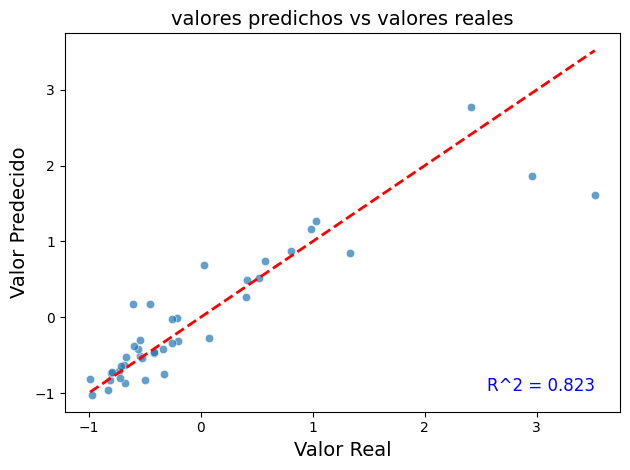

Entrenando y evaluando DecisionTreeRegressor...
Buscando las mejores características para DecisionTreeRegressor...
Características seleccionadas (175): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, highway_mpg, clasificacion_precio, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi, marca_alfa romeo, marca_audi, marca_bmw, marca_buick, marca_chevrolet, marca_dodge, marca_honda, marca_isuzu, marca_jaguar, marca_mazda, marca_mercury, marca_mitsubishi, marca_nissan, marca_peugeot, marca_plymouth, marca_porsche, marca_renault, marc

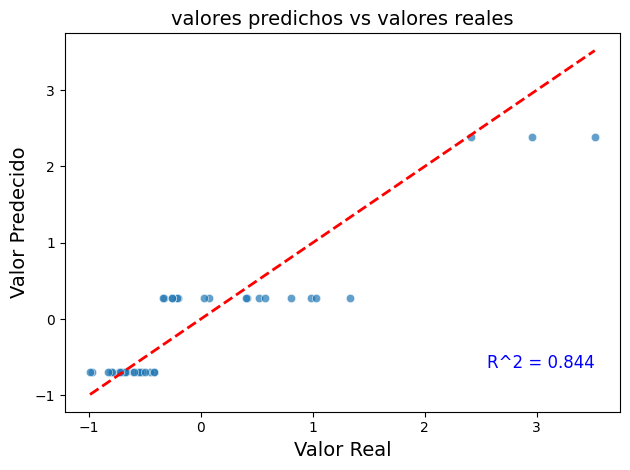

Entrenando y evaluando RandomForestRegressor...
Buscando las mejores características para RandomForestRegressor...
Características seleccionadas (172): wheel_base, car_length, car_width, car_height, curb_weight, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, highway_mpg, clasificacion_precio, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi, marca_alfa romeo, marca_audi, marca_bmw, marca_buick, marca_chevrolet, marca_dodge, marca_honda, marca_jaguar, marca_mazda, marca_mercury, marca_mitsubishi, marca_nissan, marca_peugeot, marca_plymouth, marca_porsche, marca_renault, marca_saab, marca

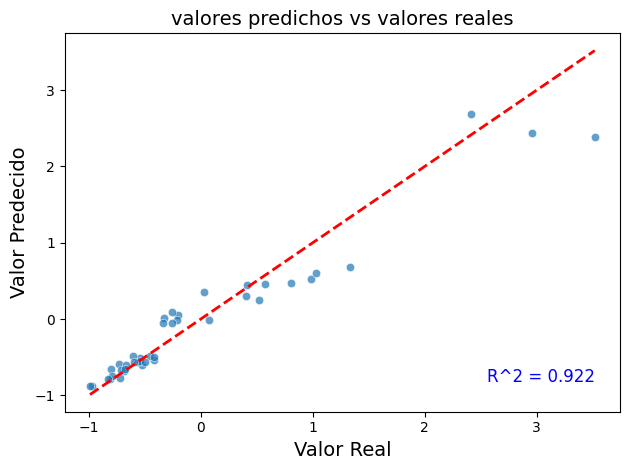

Entrenando y evaluando SVR...
Buscando las mejores características para SVR...
Características seleccionadas (17): curb_weight, engine_size, stroke, horse_power, peak_rpm, city_mpg, clasificacion_precio, door_number, car_body_hatchback, drive_wheel_rwd, engine_type_ohc, marca_audi, marca_buick, marca_nissan, marca_peugeot, marca_porsche, marca_toyota

Información sobre el modelo seleccionado:
Mejores parámetros: {'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Resultados validación cruzada del dataset de entrenamiento:

Error Absoluto Medio: 0.259
Error Cuadrático Medio : 0.161
Raíz del Error Cuadrático Medio: 0.384
Coeficiente de Determinación: 0.841
Tiempo de ejecución 784.784s


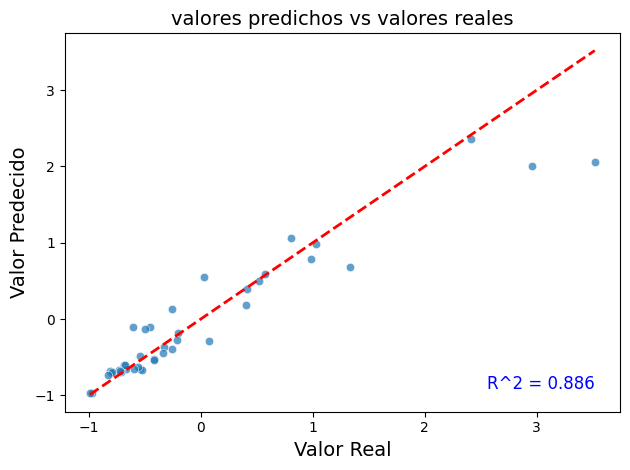

Entrenando y evaluando KNeighborsRegressor...
Buscando las mejores características para KNeighborsRegressor...
Características seleccionadas (42): wheel_base, car_width, car_height, curb_weight, engine_size, bore_ratio, stroke, horse_power, city_mpg, highway_mpg, clasificacion_precio, door_number, fuel_type_gas, aspiration_turbo, car_body_hatchback, car_body_sedan, drive_wheel_fwd, drive_wheel_rwd, engine_type_l, engine_type_ohc, fuel_system_idi, fuel_system_mpfi, marca_bmw, marca_buick, marca_isuzu, marca_mazda, marca_nissan, marca_peugeot, marca_subaru, marca_toyota, marca_volkswagen, modelo_264gl, modelo_604sl, modelo_d-max, modelo_electra 225 custom, modelo_rx-7 gs, modelo_z4, calificacion_riesgo_Muy Riesgoso, calificacion_riesgo_Neutral, calificacion_riesgo_Poco Seguro, calificacion_riesgo_Riesgoso, calificacion_riesgo_Seguro

Información sobre el modelo seleccionado:
Mejores parámetros: {'algorithm': 'kd_tree', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}

Resultados validaci

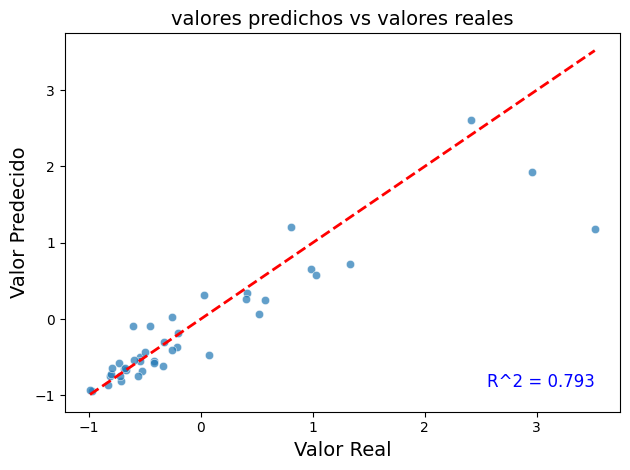

Entrenando y evaluando GradientBoostingRegressor...
Buscando las mejores características para GradientBoostingRegressor...
Características seleccionadas (171): wheel_base, car_length, car_width, car_height, curb_weight, bore_ratio, stroke, compression_ratio, peak_rpm, highway_mpg, clasificacion_precio, door_number, cylinder_number, fuel_type_gas, aspiration_turbo, car_body_hardtop, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_l, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi, marca_alfa romeo, marca_audi, marca_bmw, marca_buick, marca_chevrolet, marca_dodge, marca_honda, marca_isuzu, marca_jaguar, marca_mazda, marca_mercury, marca_mitsubishi, marca_nissan, marca_peugeot, marca_plymouth, marca_porsche, marca_renault, marca_saab, marca_subaru, marca_

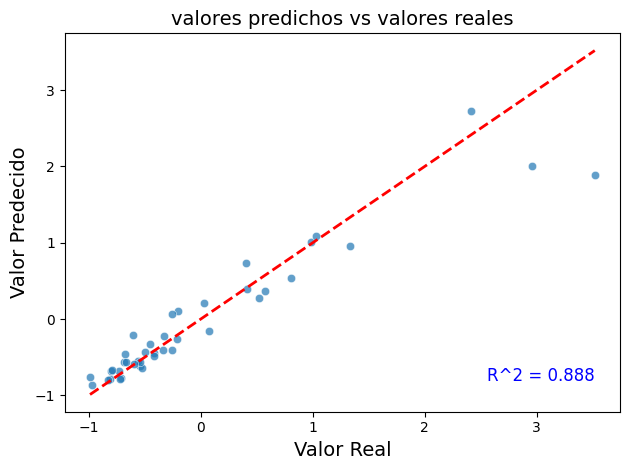


Resultados finales:
                      Modelo  Error Absoluto Medio  Error Cuadrático Medio  \
0           LinearRegression              0.612096                1.108738   
1      DecisionTreeRegressor              0.257108                0.122106   
2      RandomForestRegressor              0.214521                0.090132   
3                        SVR              0.258638                0.161033   
4        KNeighborsRegressor              0.262831                0.163294   
5  GradientBoostingRegressor              0.196647                0.069394   

   Raíz del Error Cuadrático Medio  Coeficiente de Determinación  
0                         0.901313                     -0.087025  
1                         0.342586                      0.871769  
2                         0.293920                      0.907834  
3                         0.384069                      0.840632  
4                         0.383861                      0.830686  
5                         0.26

In [126]:
# Evaluación y entrenamiento de los modelos
results = []
for model_name, (model, params) in models.items():
    print(f"Entrenando y evaluando {model_name}...")
    metrics_df = entrenamiento_evaluacion_regresion(model_name, X, y, cv=5)
    results.append(metrics_df)

# Concatenar los resultados en un solo DataFrame
results_df = pd.concat(results, ignore_index=True)
print("\nResultados finales:")
print(results_df)


# Resultados: Comparación de Modelos de Regresión

En este apartado, se presenta una tabla comparativa que resume los resultados obtenidos de los modelos de regresión empleados en el proyecto para predecir los precios de los automóviles. Se utilizaron diversas métricas clave para evaluar el rendimiento de cada modelo en esta tarea.

## Métricas Utilizadas

### Error Absoluto Medio (MAE):

El MAE representa la media de las diferencias absolutas entre los valores reales y los valores predichos por el modelo. Cuanto menor sea el MAE, mejor será el modelo en términos de precisión de predicción. El MAE es una métrica fácil de interpretar, ya que proporciona una medida de cuánto se desvían, en promedio, las predicciones del valor real.

### Error Cuadrático Medio (MSE):

El MSE mide la media de los errores al cuadrado entre los valores reales y los valores predichos por el modelo. A diferencia del MAE, el MSE penaliza más fuertemente los errores grandes debido a que los errores se elevan al cuadrado. Un MSE más bajo indica un mejor rendimiento del modelo en términos de precisión de predicción.

### Raíz del Error Cuadrático Medio (RMSE):

El RMSE es simplemente la raíz cuadrada del MSE. Esta métrica proporciona una medida en la misma escala que la variable objetivo original, lo que facilita su interpretación. Al igual que el MSE, un RMSE más bajo indica un mejor ajuste del modelo a los datos observados.

### Coeficiente de Determinación (R2):

El coeficiente de determinación, o R2, representa la proporción de la variabilidad de la variable dependiente que es explicada por el modelo. R2 varía de 0 a 1, donde un valor más cercano a 1 indica un mejor ajuste del modelo a los datos. En otras palabras, R2 cuantifica qué tan bien las características explicativas del modelo explican la variabilidad en la variable objetivo. Un R2 cercano a 1 sugiere que el modelo captura una gran parte de la variabilidad en los datos, mientras que un R2 cercano a 0 indica que el modelo no explica bien la variabilidad en la variable objetivo.

En resumen, estas métricas proporcionan una evaluación completa del rendimiento de cada modelo de regresión en la tarea de predicción de precios de automóviles, teniendo en cuenta diferentes aspectos de su capacidad predictiva y ajuste a los datos observados.

En la tabla, las letras **resaltadas en negrita** indican los valores más destacados de cada métrica. El modelo que ha demostrado ser el más efectivo para este conjunto de datos es la Potenciación del Gradiente. Este modelo tiene un coeficiente de determinación más alto, alcanzando **0.921** en el conjunto de entrenamiento y **0.932** en el conjunto de prueba. Además, se destaca por presentar los valores mínimos en las métricas de error (**MAE**, **MSE**, **RMSE**). El modelo de Potenciación del Gradiente se considera como la mejor elección para la predicción de precios de automóviles en este proyecto.